# NECESSARY LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
from wordcloud import WordCloud as WC
#from PIL import Image#for mask on wordcloud
%matplotlib inline
from re import split

# METHOD 1:INITIALISATION OF DATA init()

In [2]:
def init():
    global df
    main_df = pd.read_excel('C:/Users/Asus/MARKET_BASKET_ANALYSIS/WEEK_1/CLEANED_ONLINE_RETAIL.xlsx')#insert file path
    df=copy.deepcopy(main_df)

# METHOD 2:RELATIONSHIP BETWEEN PRODUCT AND AVERAGE ORDER QUANTITY graph()

In [3]:
def line():
    pquan = df
    pquan = pquan.dropna()
    plt.rcParams['figure.figsize'] =(20,10)
    pquan.groupby('Description')['Quantity'].sum()[:100].plot(kind='line',linewidth=2)
    plt.show()
    df.groupby('Description')['Quantity'].sum()[:1000].plot(kind='line',linewidth=5)
    plt.show()
    
def graph_line():
    Grp=df.groupby('Description')['UnitPrice'].value_counts().to_frame()
    Grp1=df.groupby('Description')['Quantity'].sum().to_frame()
    Grp=Grp.groupby(['Description']).sum()
    Grp=Grp.rename(columns={'UnitPrice':'No. of times Bought'})
    Grp1['No. of times Bought']=Grp['No. of times Bought']
    Grp1['Average Qty_Ordered']=Grp1['Quantity']/Grp1['No. of times Bought']
    Grp1.drop(Grp1.loc[Grp1['Average Qty_Ordered']<Grp1['Average Qty_Ordered'].median()].index,inplace=True)
    maximum=Grp1.nlargest(10,'Average Qty_Ordered')
    minimum=Grp1.nsmallest(10,'Average Qty_Ordered')
    g=maximum.append(minimum)
    g=g.reset_index()
    g.plot(kind='line',y='Average Qty_Ordered',x='Description',figsize=(10,10))
    plt.xlabel('Description')
    plt.ylabel('Avg Ordered_Qty')
    save=str('Avg Ordered'+' .jpeg')
    plt.savefig(save)
    plt.show()
    
    
def graph_bar():
    Grp=df.groupby('Description')['UnitPrice'].value_counts().to_frame()
    Grp1=df.groupby('Description')['Quantity'].sum().to_frame()
    Grp=Grp.groupby(['Description']).sum()
    Grp=Grp.rename(columns={'UnitPrice':'No. of times Bought'})
    Grp1['No. of times Bought']=Grp['No. of times Bought']
    Grp1['Average Qty_Ordered']=Grp1['Quantity']/Grp1['No. of times Bought']
    Grp1.drop(Grp1.loc[Grp1['Average Qty_Ordered']<Grp1['Average Qty_Ordered'].median()].index,inplace=True)
    maximum=Grp1.nlargest(10,'Average Qty_Ordered')
    minimum=Grp1.nsmallest(10,'Average Qty_Ordered')
    g=maximum.append(minimum)
    g=g.reset_index()
    g.plot(kind='bar',y='Average Qty_Ordered',x='Description',figsize=(10,10))
    plt.xlabel('Description')
    plt.ylabel('Avg Ordered_Qty')
    save=str('Avg Ordered'+' .jpeg')
    plt.savefig(save)
    plt.show()
    
    
def graph_weekly():
    cp=copy.deepcopy(df.dropna())
    cp=cp.groupby(['InvoiceDate','Description'])['UnitPrice'].value_counts().to_frame()
    cp=cp.rename(columns={'UnitPrice':'Times'})
    cp=cp.reset_index()
    cp=cp[['InvoiceDate','Description','Times']]
    cp=cp.set_index('InvoiceDate')
    cp=cp.groupby(pd.Grouper(freq='1W')).apply(lambda x: x.groupby('Description').sum())
    cpy=copy.deepcopy(df.dropna())
    cpy=cpy.groupby(['InvoiceDate','Description'])['Quantity'].sum().to_frame()
    cpy=cpy.reset_index()
    cpy=cpy.set_index('InvoiceDate')
    cpy=cpy.groupby(pd.Grouper(freq='1W')).apply(lambda x: x.groupby('Description').sum())
    cpy2=pd.merge(cp,cpy,on=['InvoiceDate','Description'],how='inner')
    cpy2['Avg Ordered']=cpy2['Quantity']/cpy2['Times']
    cpy2=cpy2.reset_index()
    test=cpy2.groupby('Description').sum()
    #selecting most brought products for avg order calculation
    test['Avg Ordered']=test['Quantity']/test['Times']
    test.sort_values(by='Times',ascending=False,inplace=True)
    test=test[:10]
    test=test.reset_index()
    test2=test['Description'].to_frame()
    final_plot=pd.merge(cpy2,test2,on='Description',how='inner')
    
    #individual plots
    def individual():
        for key,grp in final_plot.groupby('Description'):
            grp.plot(kind='line',y='Avg Ordered',x='InvoiceDate',label=key,figsize=(15,15),marker='o')
    individual()
    
    #single plot
    def grouped():
        fig,sub=plt.subplots()
        for key,grp in final_plot.groupby('Description'):
            sub=grp.plot(ax=sub,kind='line',y='Avg Ordered',x='InvoiceDate',label=key,figsize=(15,15))
            save=str(key+'.jpeg')
            plt.savefig(save)
        plt.legend(loc='best')
        #plt.show()
        
    grouped()

# CALLING METHODS

In [4]:
init()

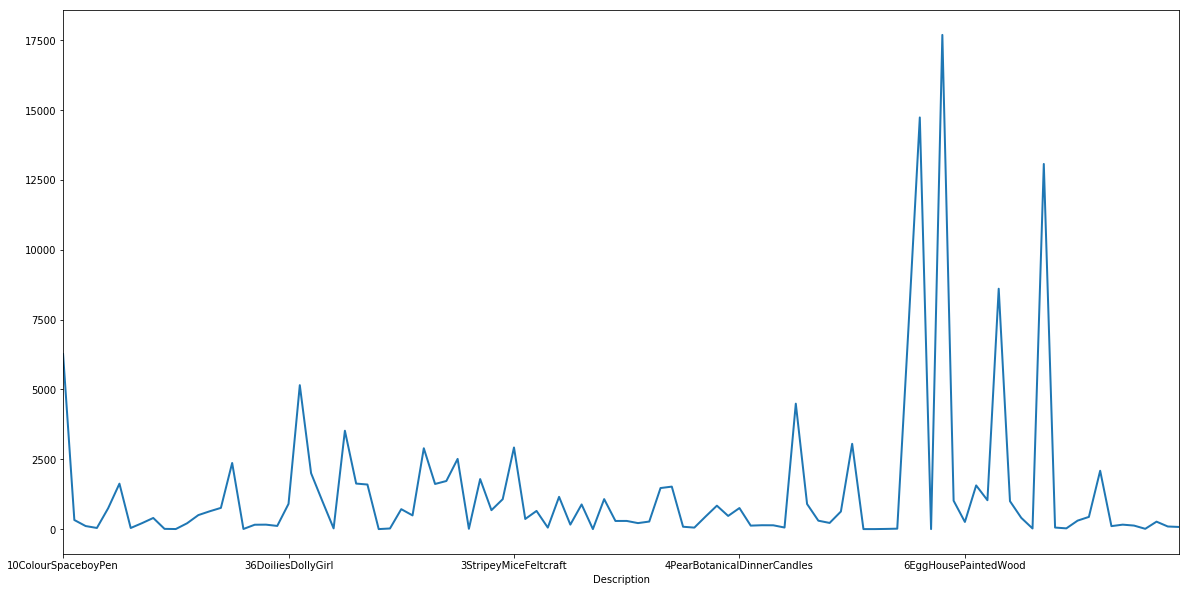

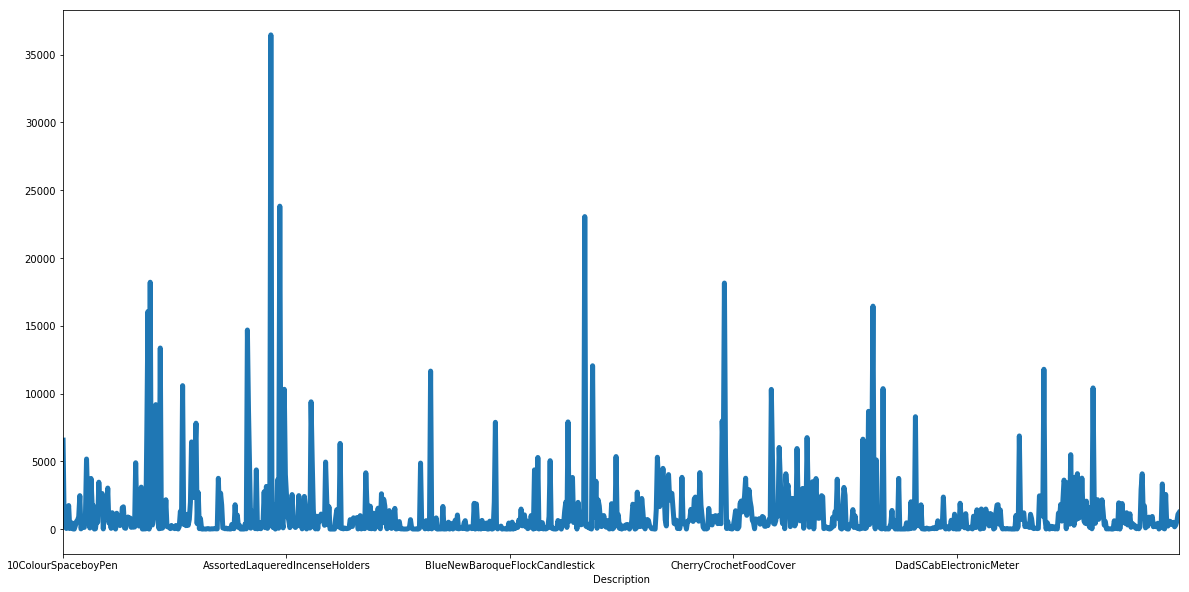

In [5]:
line()

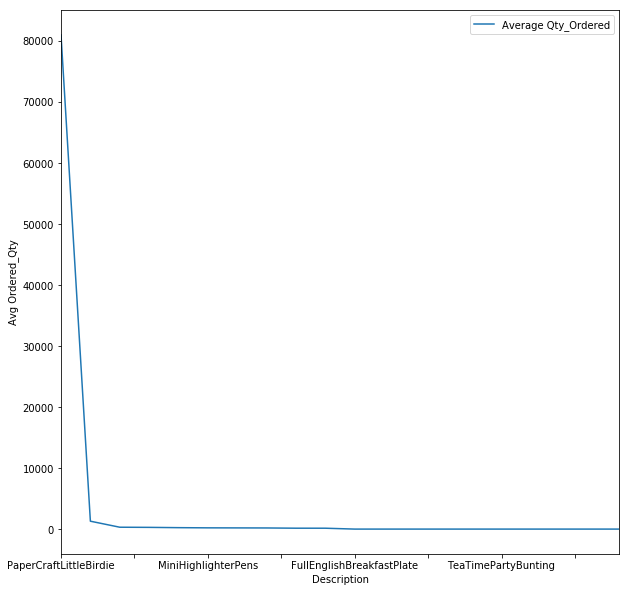

In [6]:
graph_line()

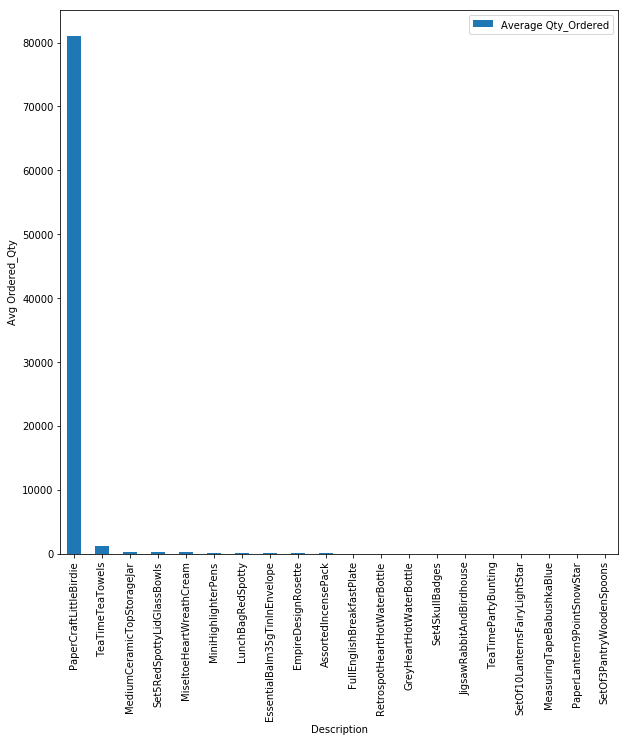

In [7]:
graph_bar()

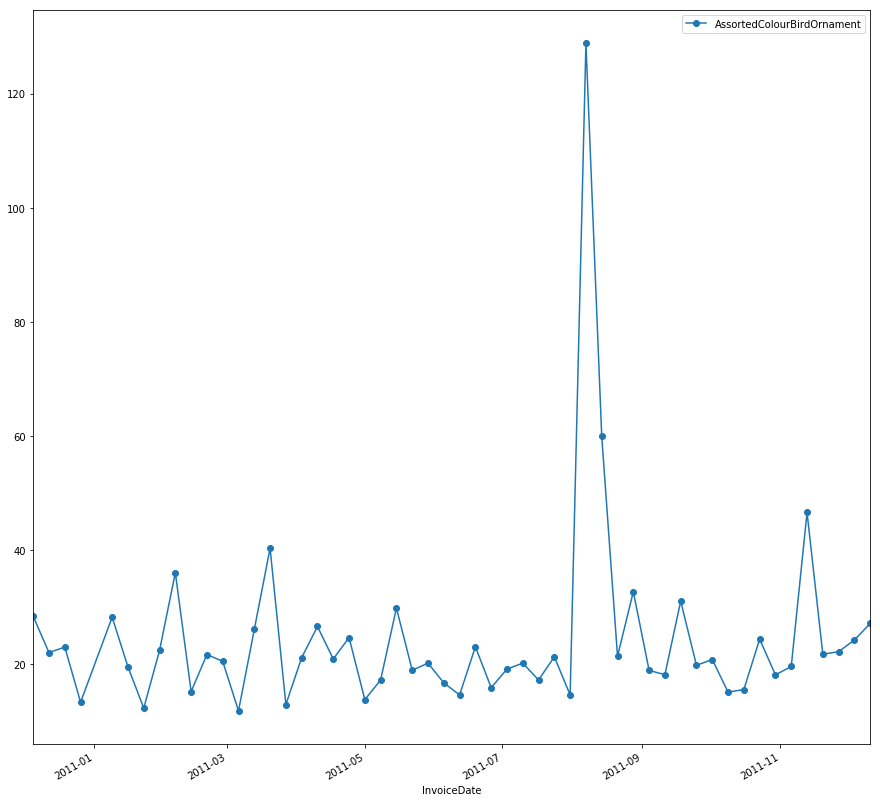

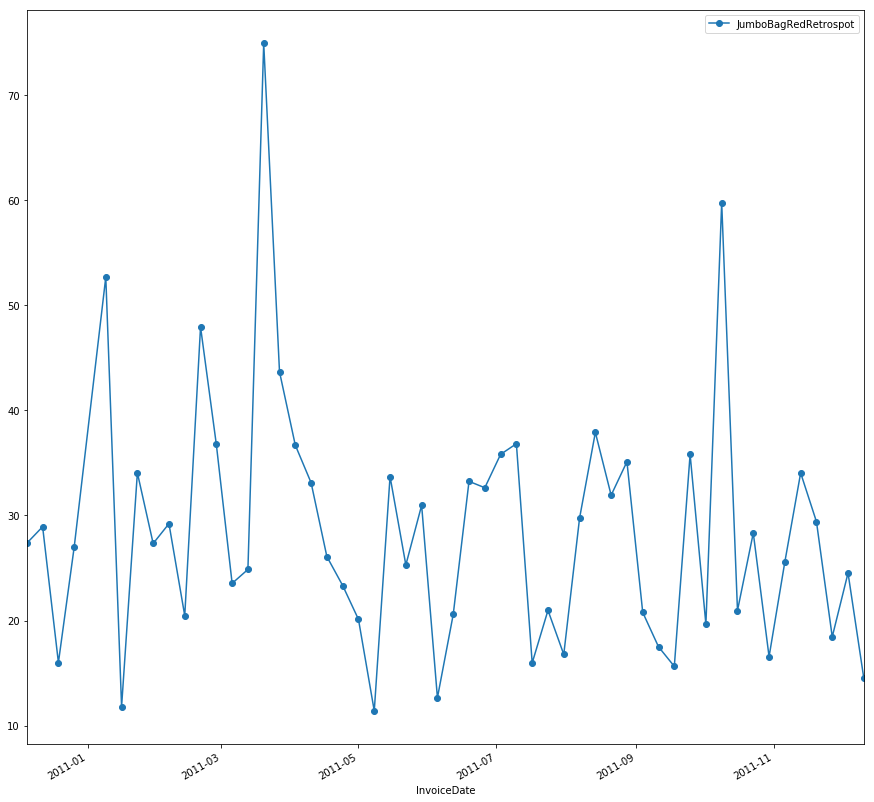

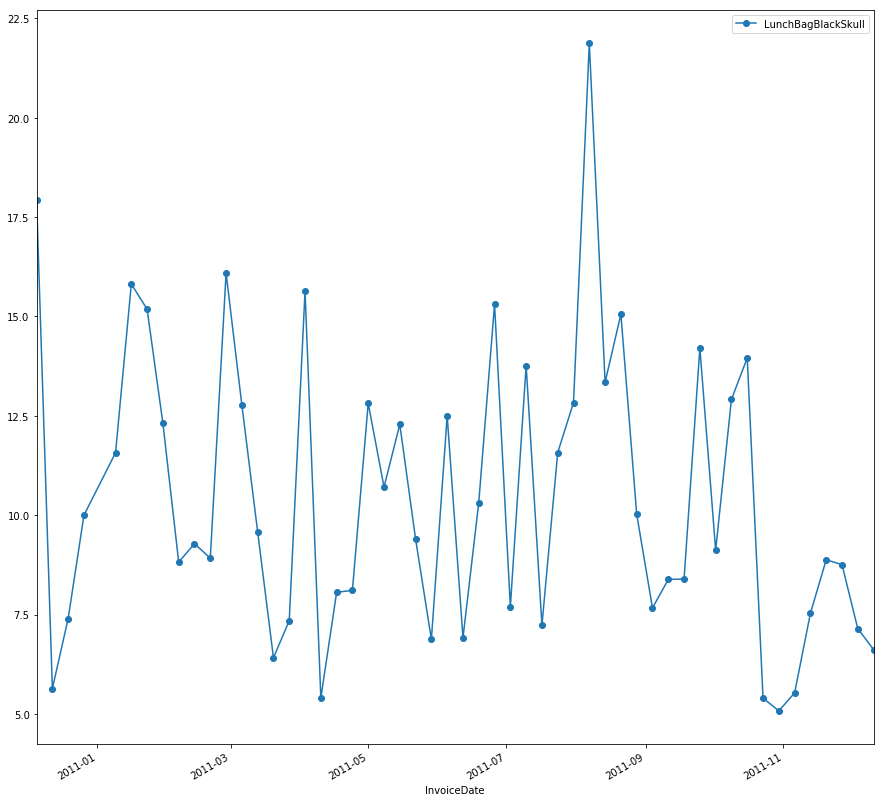

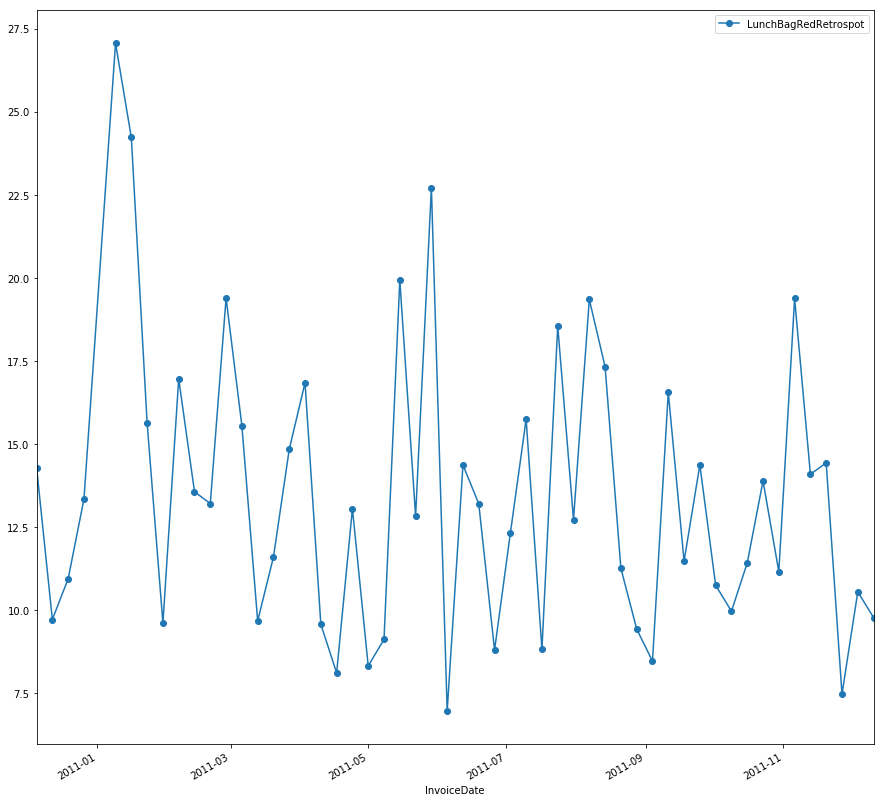

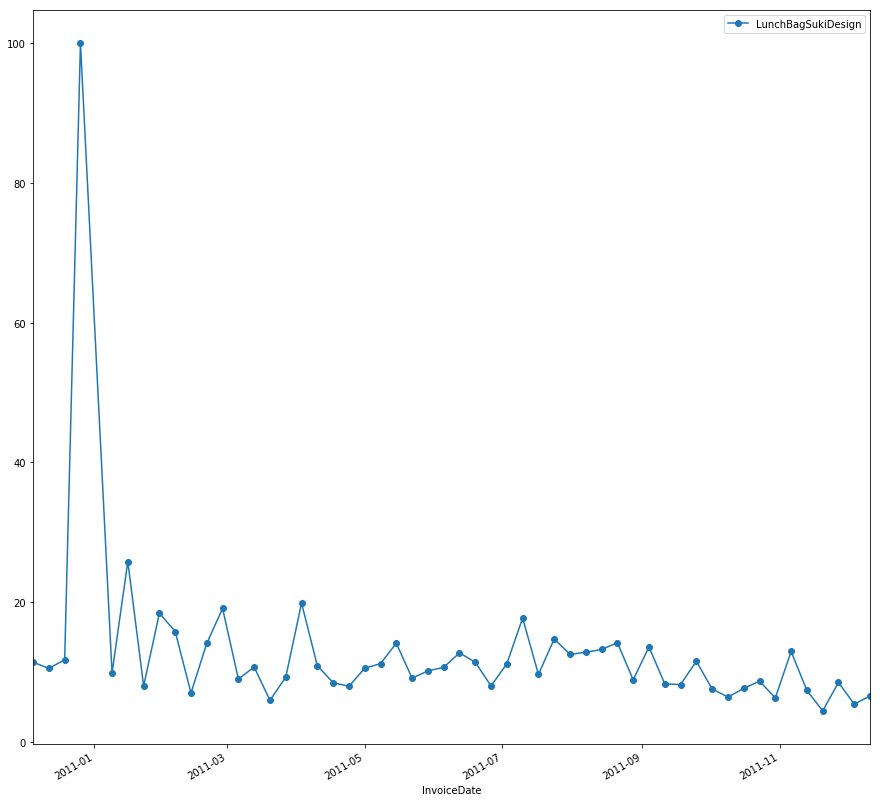

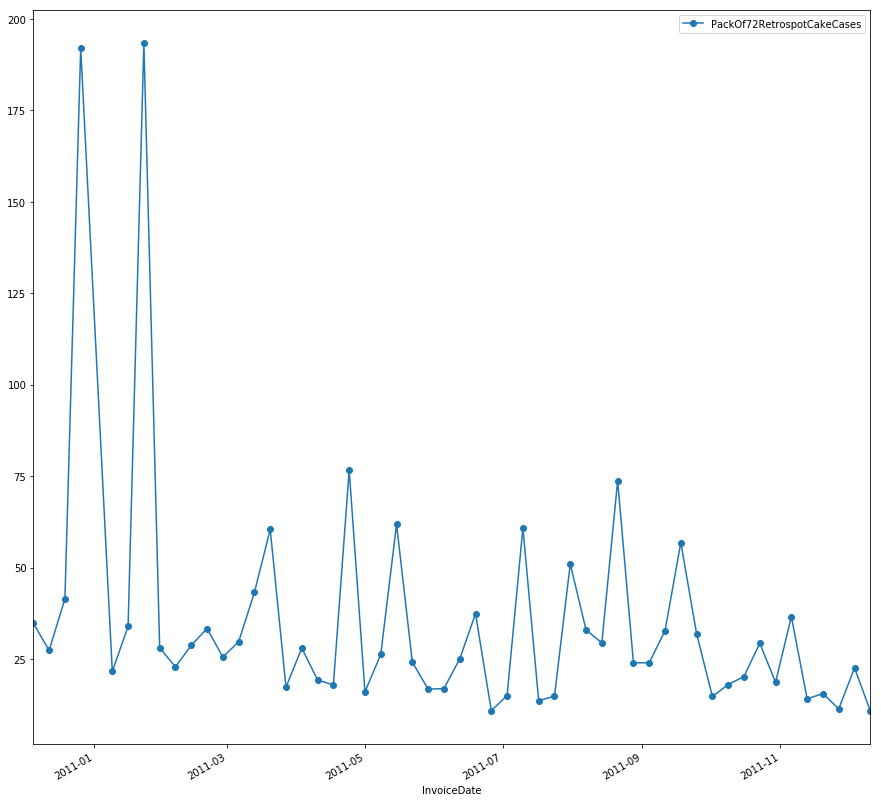

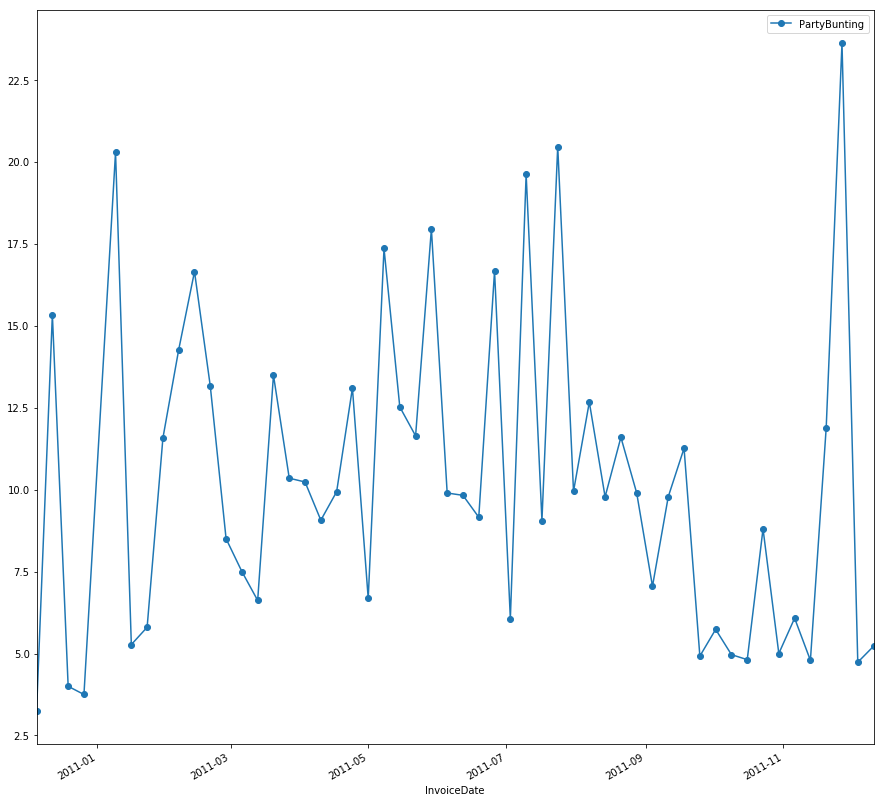

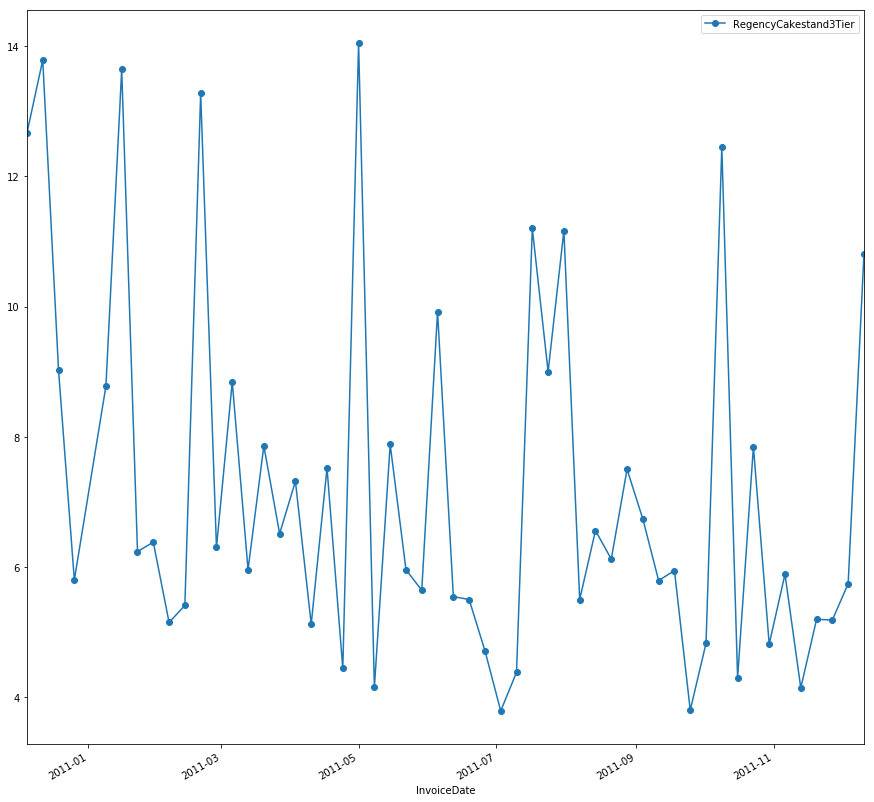

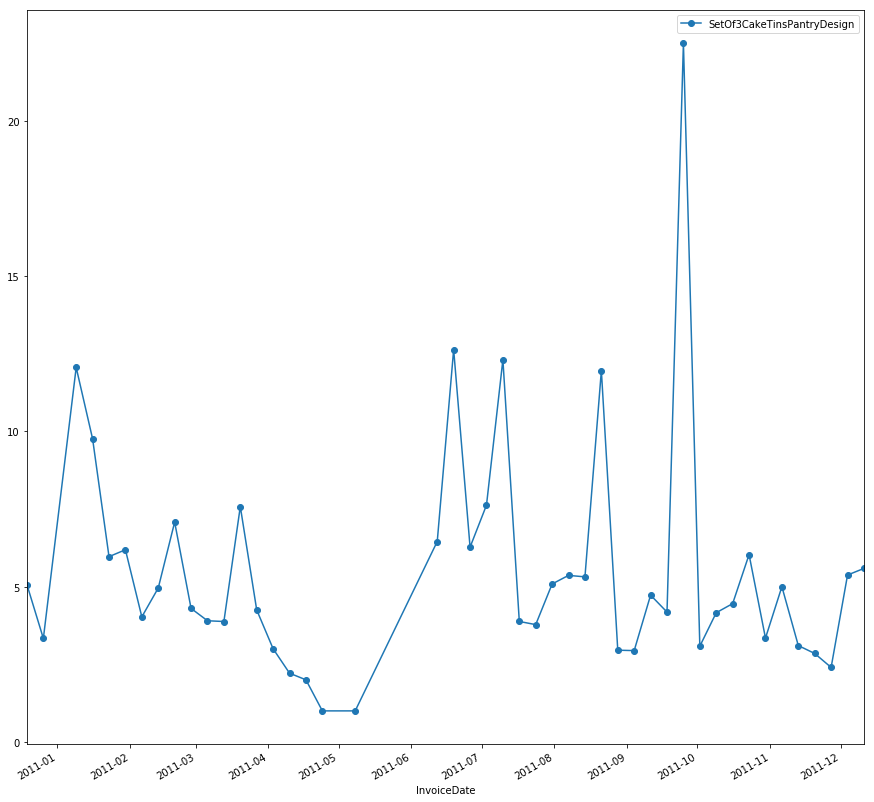

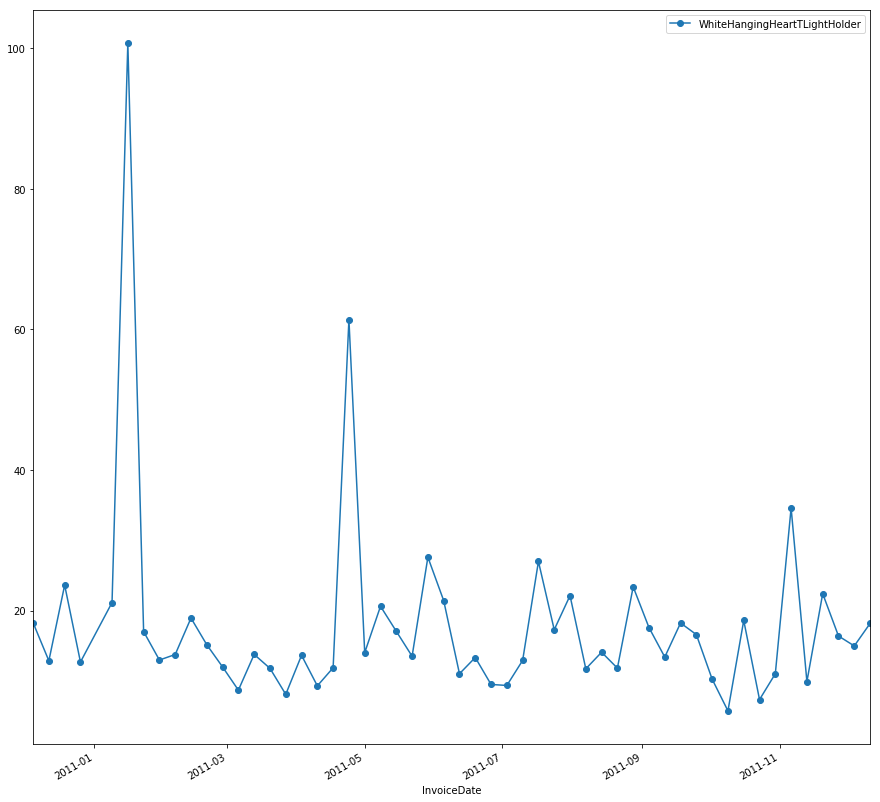

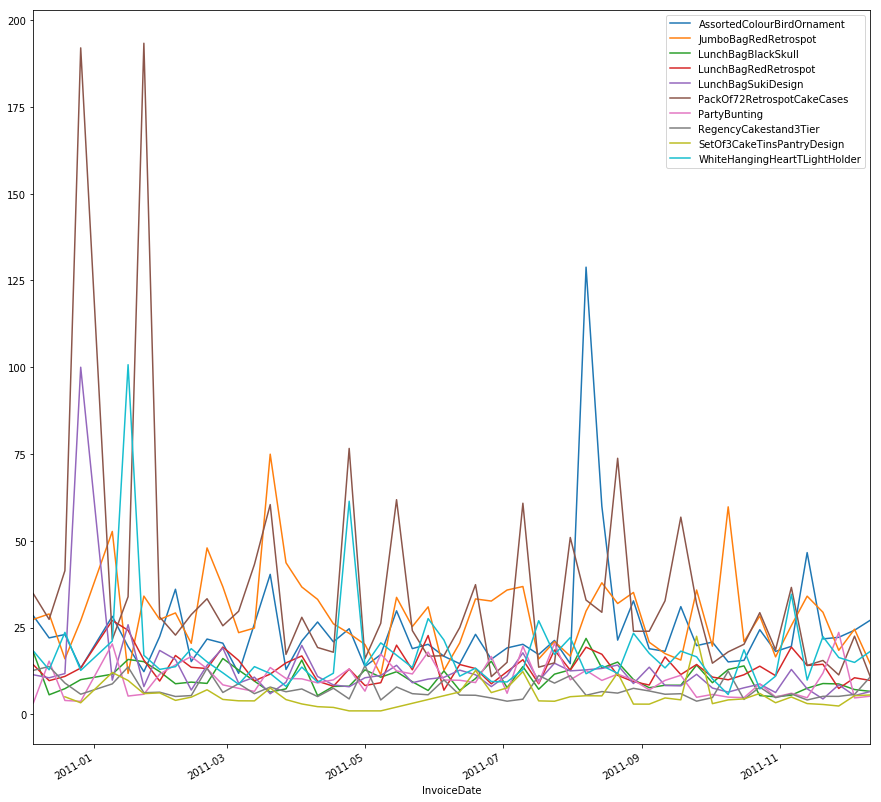

In [8]:
graph_weekly()